<a href="https://colab.research.google.com/github/diegosaldiasq/al-vectores/blob/main/k_means_vectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])

In [15]:
class F_vector:

  def __init__(self,x1,x2):
    self.x1 = x1
    self.x2 = x2
    self.grupo = Grupo(0,0) #inicializa grupo en 0 --> clase Grupo
    self.color = self.grupo.color

  def medir_d_grupo(self, grupo):
    assert type(grupo) == list, f'El arr debe ser un arreglo de grupo'
    distancias = np.array([])
    for i in grupo:
      assert type(i) == Grupo, f'Debe ser un arreglo de Grupo'
      dx = self.x1 - i.x
      dy = self.x2 - i.y
      deucl = (dx**2 + dy**2)**0.5
      distancias[deucl] = i #{distancia : grupo}
    d_min = min(distancias)

    self.grupo = distancias[d_min]

class Grupo:

  def __init__(self,x,y,nombre='sin asignar',color_grp='#000000'):
    self.x = x
    self.y = y
    self.nombre = nombre
    self.color = color_grp

  def mover_grupo(self,nuevo_x,nuevo_y):
    dx = self.x - nuevo_x
    dy = self.y - nuevo_y
    self.distancia_recorrida = (dx**2 + dy**2)**0.5
    self.x = nuevo_x
    self.y = nuevo_y
  
class Campo:

  def __init__(self,ancho=1,alto=1):
    self.ancho = ancho
    self.alto = alto
    self.fig,ax = plt.subplots(self.ancho,self.alto,figsize=(7,7),dpi=120)
    self.vectores = []
    self.grupos = []

  def agregar_F_vector(self):
    randx = X[:,0]
    randy = X[:,1]
    self.vectores.append(F_vector(randx,randy))
    
  def agregar_grupo(self):
    randx = np.random.rand(0,1)
    randy = np.random.rand(0,1)
    self.grupos.append(Grupo(randx,randy,color_grp=generar_color()))

  def mostrar_campo(self):
    self.fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
    for i in self.vectores:
      ax.scatter(i.x1,i.x2,color=i.color)
      ax.set_xlim(-1.5,2.5)
      ax.set_ylim(-2,2)
    for j in self.grupos:
      ax.scatter(j.x,j.y,color=i.color)
      ax.set_xlim(-1.5,2.5)
      ax.set_ylim(-2,2)
    plt.show()

def k_means(campo):
  romper_bucle = False
  while(True):
    for F in campo.vectores:
      F.medir_d_grupo(campo.grupos)
      F.color = F.grupo.color
    for S in campo.grupos:
      dist_x = 0
      dist_y = 0
      cantidad_vectores = 0
      for V in campo.vectores:
        if V.grupo == S:
          dist_x += V.x
          dist_y += V.y
          cantidad_vectores += 1
      if cantidad_vectores != 0:
        new_x = dist_x/cantidad_vectores
        new_y = dist_y/cantidad_vectores
        S.mover_grupo(new_x,new_y)
    campo.mostrar_campo()
    distancias_recorridas = []
    for sem in campo.grupos:
      print(sem.distancias_recorridas)
      distancias_recorridas.append(sem.distancias_recorridas)
    if max(distancias_recorridas) < 0.5:
      romper_bucle = True
    print(romper_bucle)
    if romper_bucle == True:
      break
  campo.mostrar_campo()

def generar_color():
  letras = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
  n = '#'
  for _ in range(6):
    n = n + random.choice(letras)
  return n

In [21]:
a = np.array([0,-1,0])
b = np.array([-1,0,0])

cosfi = a@b/(np.linalg.norm(a)*np.linalg.norm(b))
ang = np.arccos(cosfi)
cosfi

0.0

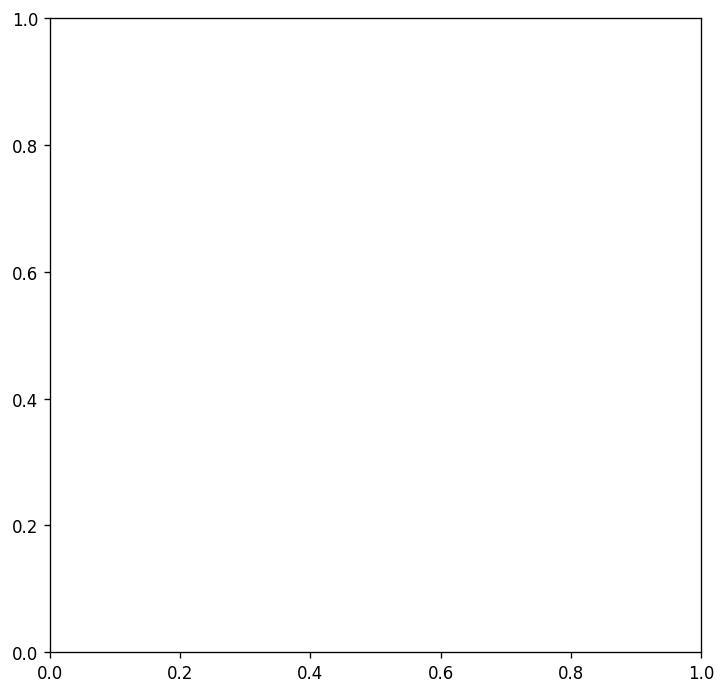

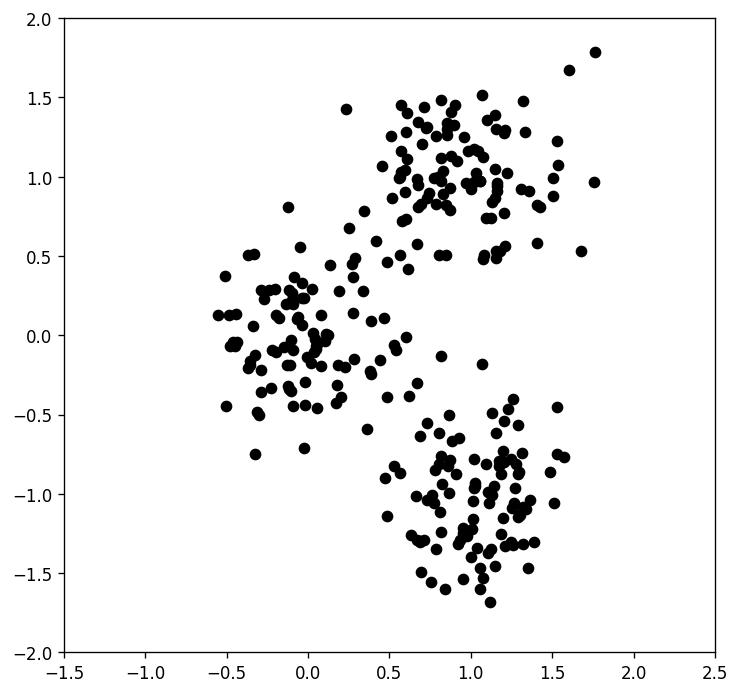

IndexError: ignored

In [14]:
campo = Campo()
campo.agregar_F_vector()
campo.agregar_grupo()
campo.mostrar_campo()
k_means(campo)